# 머신러닝을 왜쓸가?

전통 적인 프로그래밍?
- 문제 발생 -> 문제 해결??? 어떻게???
- 규칙 작성???? -> 소프트웨어 작성
    - 확인 -> 문제 발생 -> 문제 해결(알고리즘 수정) -> 확인 

머신러닝??
- 문제 -> 문제 해결?? 어떻게??
- 모델(알고리즘)을 만든다 -> 문제를 유발하는 데이터들 -> 모델을 학습(fit)시킨다.
    - 확인(예측) -> 문제 발생 -> 문제 해결 (모델을 다시 학습시킨다.)

# 대표적인 머신러닝 어플리케이션
- 이미지 
    - CNN
- 자연어 처리, 음성인식
    - RNN 
- 게임
    - 강화학습
        -심리학적 요소들
- 예술
    - GAN
    - 딥페이크 찾아내기 
- 분류
    - 군집알고리즘

# 머신러닝의 종류
- 훈련 방법 : 지도, 비지도, 준지도, 강화
- 훈련 시점 : 온라인, 배치 
- 모델 생성 : 사례, 모델 

## 지도학습
- 회귀 
    - 선형회귀
    - 로지스틱 회귀
- 분류
    - SVM
    - DT, 앙상블
- 신경망
    - CNN
    - RNN
    - GAN
    - GPT-3 : 자연어 처리 모델
   

# 비지도 학습
- k-m
- PCA
- 가우시안

In [1]:
import os
import sys
import sklearn
import urllib

In [2]:
# 데이터 다운로드
datapath = os.path.join("datasets", "lifesat", "")
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

In [3]:
# %matplotlib inline 실행할 필요없다.

In [4]:
import pandas as pd

In [5]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

In [6]:
oecd_bli

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.10,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.00,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.00,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.20,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.90,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3287,EST,Estonia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.43,NaN,NaN
3288,ISR,Israel,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.24,E,Estimated value
3289,RUS,Russia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.75,E,Estimated value
3290,SVN,Slovenia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.12,NaN,NaN


In [7]:
# 데이터 전처리.oecd_bli, gdp_per_capita 두개 데이터를 합치는 함수
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [8]:
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

In [9]:
import numpy as np
X = np.c_[country_stats['GDP per capita']]

In [10]:
y = np.c_[country_stats['Life satisfaction']]

In [11]:
import sklearn

In [1]:
import sklearn.linear_model

In [2]:
model = sklearn.linear_model.LinearRegression()

In [17]:
model.fit(X,y)

LinearRegression()

In [18]:
X_new = [[22587]]

In [19]:
model.predict(X_new)

array([[5.96242338]])

In [21]:
import matplotlib.pyplot as plt

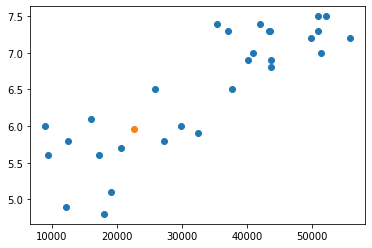

In [22]:
plt.scatter(X,y)
plt.scatter(X_new, model.predict(X_new))
plt.show()

In [25]:
X_1 = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
Y_1= np.array([1, 1, 2, 2])

In [26]:
model_1= sklearn.linear_model.SGDClassifier()

In [27]:
model_1.fit(X_1, Y_1)

SGDClassifier()

In [29]:
model_1.predict([[1,2]])

array([2])

# 정리
- 데이터 선택
- 모델 객체 생성
- 모델 훈련
- 데이터 예측

In [31]:
model_1.get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

# 머신러닝의 주요 과제

- 데이터가 충분하지 않음
    - 데이터가 많아야 학습이 잘된다
    - 학습이 잘되면 성능이 좋은 알고리즘 탄생
- 데이터에 대표성이 없을수 있다.
- 낮은 품질의 데이터
- 과대적합 
    - 훈련 세트에 너무 특화되어 있음. -> 실제 예측 성능이 낮아 진다.
    - 나는 모의고사만 판다 -> 수능망함
    - 해결방안은???
- 과소 적합 발생
    - 모델이 너무 학습이 안되어있다.
    - 특징을 못찾음
    - 주가 예측 -> 1/2 
        - 사람 40%, 침패치 60% 
